In [ ]:
import pandas as pd
from tensorflow.keras.optimizers import RMSprop, Nadam
from tensorflow.keras.regularizers import l1
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import Model
from os import getcwd
from keras.layers import Dense, Activation, BatchNormalization
import tensorflow as tf

In [ ]:
#pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import *

In [ ]:
train =  '/content/drive/MyDrive/skin-disease-dataset/train'
test = '/content/drive/MyDrive/skin-disease-dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = r'/content/drive/MyDrive/skin-disease-dataset/train'
TESTING_DIR = r'/content/drive/MyDrive/skin-disease-dataset/test'
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range = 40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    validation_split=0.05,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=20,
    class_mode='categorical',
    target_size = (150, 150)
)


validation_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size = 20,
    class_mode='categorical',
    target_size=(150, 150)
)

Found 2733 images belonging to 6 classes.
Found 686 images belonging to 6 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience = 6, verbose=0, mode='min')
#mcp_save_xc = ModelCheckpoint('skin_disease_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
preModel  = InceptionV3(input_shape= (150,150,3), include_top= False, weights= 'imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in preModel.layers:
  layer.trainable = True


In [ ]:
preModel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:

last_layer = preModel.get_layer('mixed7')
last_output = last_layer.output


In [ ]:

from tensorflow.keras import layers, Model
import tensorflow as tf

# Define preModel and last_output here
preModel  = InceptionV3(input_shape= (150,150,3), include_top= False, weights= 'imagenet')
last_layer = preModel.get_layer('mixed7')
last_output = last_layer.output

# Now you can define x
x = layers.Flatten()(last_output)

# Increase model complexity and add regularization
x = layers.Dense(1024, activation='relu', activity_regularizer=l1(0.00001))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu', activity_regularizer=l1(0.00001))(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(6, activation='softmax')(x)

model = Model(preModel.input, x)

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
# Increase model complexity and add regularization
x = layers.Dense(1024, activation='relu', activity_regularizer=l1(0.00001))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu', activity_regularizer=l1(0.00001))(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(6, activation='softmax')(x)

model = Model(preModel.input, x)

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model = Model(preModel.input,x)

In [ ]:

from tensorflow.keras.optimizers import Nadam
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalization_94

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
mcp_save_xc = ModelCheckpoint(filepath='/content/drive/MyDrive/skin-disease-dataset/skin_disease_model.hdf5', save_best_only=True, monitor='loss', mode='min')


# Define callbacks

reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=7, verbose=1, mode='min')
earlyStopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min')

# Then you can use them in your fit method
history = model.fit(
    train_generator,
    callbacks=[mcp_save_xc, reduce_lr_loss, earlyStopping],
    validation_data=validation_generator,
    epochs=50,
    verbose=1
)


Epoch 1/50
137/137 [==============================] - ETA: 0s - loss: 1.7886 - accuracy: 0.1972

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 829s 6s/step - loss: 1.7886 - accuracy: 0.1972 - val_loss: 1.7431 - val_accuracy: 0.2901 - lr: 1.0000e-04
Epoch 2/50
137/137 [==============================] - 78s 565ms/step - loss: 1.7095 - accuracy: 0.2832 - val_loss: 1.6847 - val_accuracy: 0.2682 - lr: 1.0000e-04
Epoch 3/50
137/137 [==============================] - 78s 568ms/step - loss: 1.6150 - accuracy: 0.3253 - val_loss: 1.6298 - val_accuracy: 0.3076 - lr: 1.0000e-04
Epoch 4/50
137/137 [==============================] - 79s 537ms/step - loss: 1.5685 - accuracy: 0.3571 - val_loss: 1.5389 - val_accuracy: 0.3513 - lr: 1.0000e-04
Epoch 5/50
137/137 [==============================] - 78s 531ms/step - loss: 1.5226 - accuracy: 0.3900 - val_loss: 1.5285 - val_accuracy: 0.3557 - lr: 1.0000e-04
Epoch 6/50
137/137 [==============================] - 78s 567ms/step - loss: 1.4903 - accuracy: 0.3908 - val_loss: 1.5009 - val_accuracy: 0.3936 - lr: 1.0000e-04
Epoch 7/50
137/137 [=====================

In [ ]:
model.load_weights('/content/drive/MyDrive/skin-disease-dataset/skin_disease_model.hdf5')

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255)
testing_dir = '/content/drive/MyDrive/skin-disease-dataset/test'
testing_generator = testing_datagen.flow_from_directory(
  testing_dir,
    batch_size=128,
    class_mode='categorical',
    target_size = (150, 150)
)

Found 686 images belonging to 6 classes.


In [ ]:
predict = model.predict(testing_generator)

6/6 [==============================] - 5s 696ms/step


In [ ]:
pred = predict.argmax(axis = -1)

In [ ]:
score = model.evaluate(testing_generator, batch_size=1, verbose=1)

6/6 [==============================] - 4s 687ms/step - loss: 1.2042 - accuracy: 0.6676


In [ ]:
score

[1.2042112350463867, 0.6676384806632996]

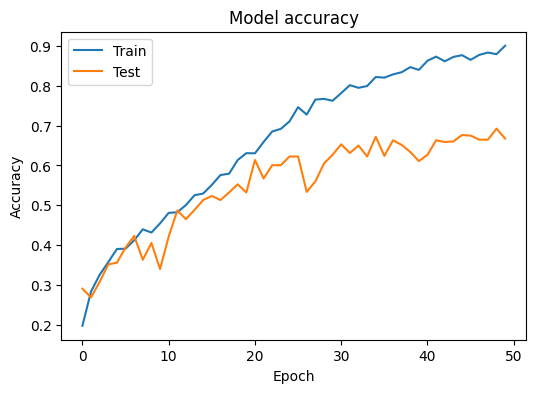

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


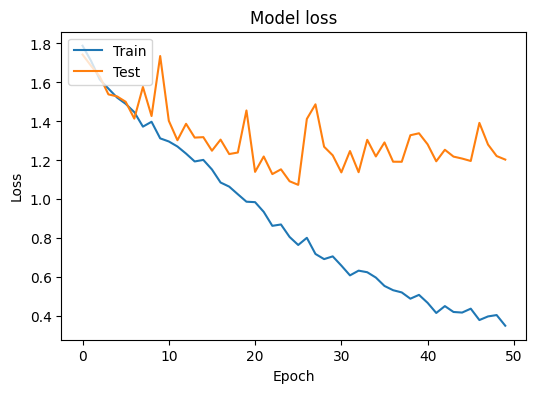

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from keras.applications import VGG16

In [ ]:
preModelVgg  = VGG16(input_shape= (150,150,3), include_top= False, weights= 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

for layer in preModelVgg.layers[:15]:
    layer.trainable = False


In [ ]:
preModelVgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
last_layer = preModelVgg.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.layers import PReLU  # Import PReLU separately if needed

x = Conv2D(32, padding='same', activation=PReLU(), kernel_size=3)(last_output)
x = MaxPooling2D(pool_size=(3, 3), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation=PReLU())(x)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)


In [ ]:
model = Model(preModelVgg.input,x)

In [ ]:

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
history = model.fit(
      train_generator,
      callbacks=[ mcp_save_xc, reduce_lr_loss,earlyStopping],
      validation_data = testing_generator,
      epochs = 50,
      verbose = 1,
 )

Epoch 1/50
137/137 [==============================] - 53s 378ms/step - loss: 1.7933 - accuracy: 0.1983 - val_loss: 1.7134 - val_accuracy: 0.2741 - lr: 1.0000e-04
Epoch 2/50
137/137 [==============================] - 51s 373ms/step - loss: 1.7281 - accuracy: 0.2503 - val_loss: 1.7185 - val_accuracy: 0.2536 - lr: 1.0000e-04
Epoch 3/50
137/137 [==============================] - 51s 370ms/step - loss: 1.6563 - accuracy: 0.3172 - val_loss: 1.5425 - val_accuracy: 0.3805 - lr: 1.0000e-04
Epoch 4/50
137/137 [==============================] - 51s 370ms/step - loss: 1.6221 - accuracy: 0.3202 - val_loss: 1.5641 - val_accuracy: 0.3630 - lr: 1.0000e-04
Epoch 5/50
137/137 [==============================] - 51s 371ms/step - loss: 1.5821 - accuracy: 0.3516 - val_loss: 1.5177 - val_accuracy: 0.3921 - lr: 1.0000e-04
Epoch 6/50
137/137 [==============================] - 51s 371ms/step - loss: 1.5549 - accuracy: 0.3827 - val_loss: 1.4507 - val_accuracy: 0.4198 - lr: 1.0000e-04
Epoch 7/50
137/137 [========